<a href="https://colab.research.google.com/github/prithvi-raj-b/cv-session/blob/main/Prithvi%20Raj%20B_ME20B137/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

## Question 1

In [60]:
!wget https://github.com/sgauthamr2001/cv-session/raw/main/media/einstein.jpg

--2021-07-10 14:32:38--  https://github.com/sgauthamr2001/cv-session/raw/main/media/einstein.jpg
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sgauthamr2001/cv-session/main/media/einstein.jpg [following]
--2021-07-10 14:32:38--  https://raw.githubusercontent.com/sgauthamr2001/cv-session/main/media/einstein.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109109 (107K) [image/jpeg]
Saving to: ‘einstein.jpg.3’

einstein.jpg.3      100%[===================>] 106.55K  --.-KB/s    in 0.03s   

2021-07-10 14:32:38 (4.02 MB/s) - ‘einstein.jpg.3’ saved [109109/109109]



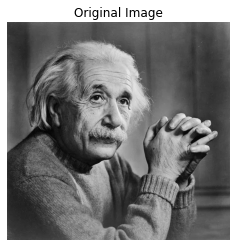

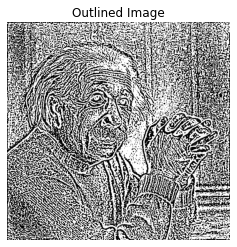

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Reading the image
img = cv2.imread('einstein.jpg')
blur_gaus1 = cv2.GaussianBlur(img,(5,5),0)
blur_gaus2 = cv2.GaussianBlur(img,(9,9),0)
blur_gaus = blur_gaus1 - blur_gaus2
#Plotting the images

plt.figure(),plt.axis("off"),plt.title("Original Image"),plt.imshow(img)
plt.figure(),plt.axis("off"),plt.title("Outlined Image"),plt.imshow(blur_gaus)
plt.show()

## Question 2

In [15]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [13]:
img = cv2.imread('Screenshot.png')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv_img], [0, 1], None, [180, 256], [0, 180, 0, 256])

In [37]:
cap = cv2.VideoCapture('drive/MyDrive/videoplayback.mp4')
ret, frame = cap.read()
hsv_frame = cv2.cvtColor(frame, cv.COLOR_BGR2HSV)

In [38]:
# normalize histogram and apply backprojection
cv.normalize(hist,hist,0,255,cv.NORM_MINMAX)
res = cv.calcBackProject([hsv_frame],[0,1],hist,[0,180,0,256],1)

disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cv2.filter2D(res, -1, disc, res)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 6, 4, 6],
       [0, 0, 0, ..., 6, 4, 4],
       [0, 0, 0, ..., 7, 3, 0]], dtype=uint8)

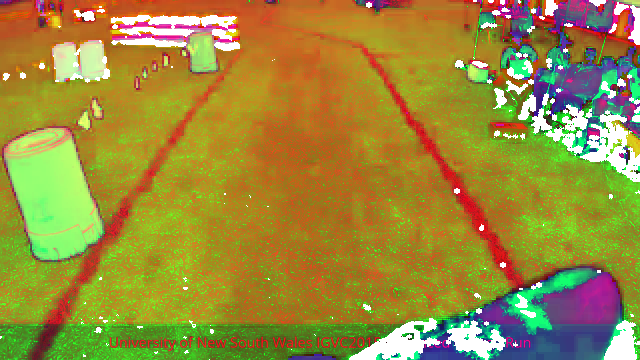

In [57]:
ret,thresh = cv.threshold(res,7,255,cv.THRESH_BINARY)
final = cv.merge((thresh,thresh,thresh))
result = cv2.bitwise_or(hsv_frame, final)
cv2_imshow(result)

cap.release()
cv2.destroyAllWindows()